## Training ANN on Two Spiral Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def check_accuracy(predictions, labels):
      pred_class = np.argmax(predictions, 1)
      true_class = np.argmax(labels, 1)
      return (100.0 * np.sum(pred_class == true_class) / predictions.shape[0])

## View the Dataset

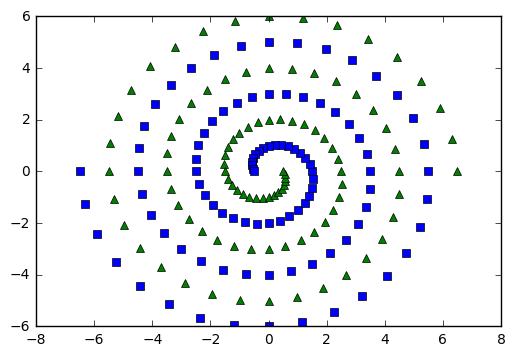

In [2]:
def plot_spirals(x, output, final):
    df = pd.concat([x, output], axis=1)
    if(final):
        x1 = df['x'][df['Class']==0]
        y1 = df['y'][df['Class']==0]
        x2 = df['x'][df['Class']==1]
        y2 = df['y'][df['Class']==1]
    else: 
        x1 = df['x'][df['0']==0]
        y1 = df['y'][df['0']==0]
        x2 = df['x'][df['0']==1]
        y2 = df['y'][df['0']==1]
    plt.plot(x1,y1, 'bs')
    plt.plot(x2,y2, 'g^')
    plt.show()
 
## import two-spiral data
x = pd.read_csv('TwoSpiralX.csv')
output = pd.read_csv('TwoSpiralY.csv')
plot_spirals(x, output, False)


### Testing & Training Datasets

In [3]:
## testing and training sets
x = np.array(x).astype(np.float32)
output = np.array(output).astype(np.float32)
size = len(x)
train_size = 164
test_size = 30
all_rows = np.array(list(range(size)))
check = 100
test_accs = list()
counters = list()
while(check != 15): ## make sure test sets are even 
  train_rows = np.random.choice(size, size = train_size, replace=False)
  test_rows = np.array(list(set(all_rows) - set(train_rows)))
  xtrain = x[train_rows,:]
  ytrain = output[train_rows,:]
  xtest = x[test_rows,:]
  ytest = output[test_rows,:]
  check = np.sum((ytest[:,0] == 1))

### ANN Structure & Set-up

In [4]:
## placeholders 
x_ = tf.placeholder(tf.float32, [train_size, 2])
y_ = tf.placeholder(tf.float32, [train_size, 2])

## ANN structure
W1 = tf.Variable(tf.random_uniform([2, 32], minval=-.1, maxval=.1, dtype=np.float32, name='W1'))
b1 = tf.Variable(tf.zeros([1, 32], dtype=np.float32))

W2 = tf.Variable(tf.random_uniform([32, 2], minval=-.1, maxval=.1, dtype=np.float32, name= 'W2'))
b2 = tf.Variable(tf.zeros([2], dtype=np.float32))

y = tf.nn.softmax(tf.matmul(
              (tf.nn.relu(tf.matmul(xtrain, W1) + b1)),
  W2) + b2)

yt = tf.nn.softmax(tf.matmul(
              (tf.nn.relu(tf.matmul(xtest, W1) + b1)),
  W2) + b2)

## define loss and optimizer
eps = .001 
eta = .01
cross_entropy = -tf.reduce_sum(y_*tf.log(y + eps))
train = tf.train.GradientDescentOptimizer(eta).minimize(cross_entropy)

### Initialze & Launch Graph

In [5]:
## start session 
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)

### Train

In [6]:
## train 
for i in range(20000):
  result = sess.run([cross_entropy, train], feed_dict ={x_: xtrain, y_: ytrain})
  CE = result[0] 
  if i%5000 == 0:
      print("Step: " + str(i))
      train_acc = check_accuracy(y.eval(), ytrain)
      test_acc = check_accuracy(yt.eval(), ytest)
      print('Train accuracy: ' + str(train_acc))
      print('Test accuracy: ' + str(test_acc))
      print('cross entropy : ' + str(CE))

Step: 0
Train accuracy: 53.0487804878
Test accuracy: 56.6666666667
cross entropy : 113.279
Step: 5000
Train accuracy: 59.756097561
Test accuracy: 53.3333333333
cross entropy : 111.167
Step: 10000
Train accuracy: 60.3658536585
Test accuracy: 53.3333333333
cross entropy : 111.396
Step: 15000
Train accuracy: 60.3658536585
Test accuracy: 53.3333333333
cross entropy : 111.571


### Evaluate



Train accuracy: 57.3170731707
Test accuracy: 46.6666666667


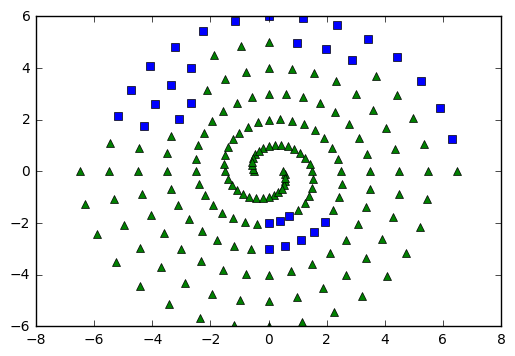

In [7]:
## evaluate model 
train_acc = check_accuracy(y.eval(), ytrain)
test_acc = check_accuracy(yt.eval(), ytest)
print('\n')
print('Train accuracy: ' + str(train_acc))
print('Test accuracy: ' + str(test_acc))

Y_preds = pd.DataFrame(np.argmax(y.eval(),1).tolist() + np.argmax(yt.eval(),1).tolist())
Y_preds.columns = ['Class']
X_concat = pd.DataFrame(np.concatenate((xtrain, xtest)))
X_concat.columns = ['x', 'y']
plot_spirals(X_concat, Y_preds, True)